# Intro to PCA, t-SNE & UMAP

In [108]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px

#sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#UMAP
import umap.umap_ as umap
import umap.plot

## Load Data
13개의 피쳐를 가진 데이터를 와인 데이터셋을 준비합니다.

In [15]:
data = pd.read_csv('../data/wine-clustering.csv')
#Dimensions
print('Dataframe dimensions:', data.shape)

Dataframe dimensions: (178, 13)


In [16]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## EDA

In [21]:
#Null data 비율 표시
for col in data.columns:
    msg = f'column: {col:<10}\t Percent of NaN value: {data[col].isnull().sum()/len(data)}%'
    print(msg)

column: Alcohol   	 Percent of NaN value: 0.0%
column: Malic_Acid	 Percent of NaN value: 0.0%
column: Ash       	 Percent of NaN value: 0.0%
column: Ash_Alcanity	 Percent of NaN value: 0.0%
column: Magnesium 	 Percent of NaN value: 0.0%
column: Total_Phenols	 Percent of NaN value: 0.0%
column: Flavanoids	 Percent of NaN value: 0.0%
column: Nonflavanoid_Phenols	 Percent of NaN value: 0.0%
column: Proanthocyanins	 Percent of NaN value: 0.0%
column: Color_Intensity	 Percent of NaN value: 0.0%
column: Hue       	 Percent of NaN value: 0.0%
column: OD280     	 Percent of NaN value: 0.0%
column: Proline   	 Percent of NaN value: 0.0%


In [26]:
#중복 데이터 확인
print(f'Duplicates in dataset: {data.duplicated().sum()}, ({np.round(100*data.duplicated().sum()/len(data),1)}%)')

Duplicates in dataset: 0, (0.0%)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## Preprocessing

In [29]:
standardization = StandardScaler()

X = pd.DataFrame(standardization.fit_transform(data), columns=data.columns)

### PCA

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data = X_pca, columns=['PC1','PC2'])

In [42]:
pca_df.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


PCA plot in 2D

Text(0, 0.5, 'PC2')

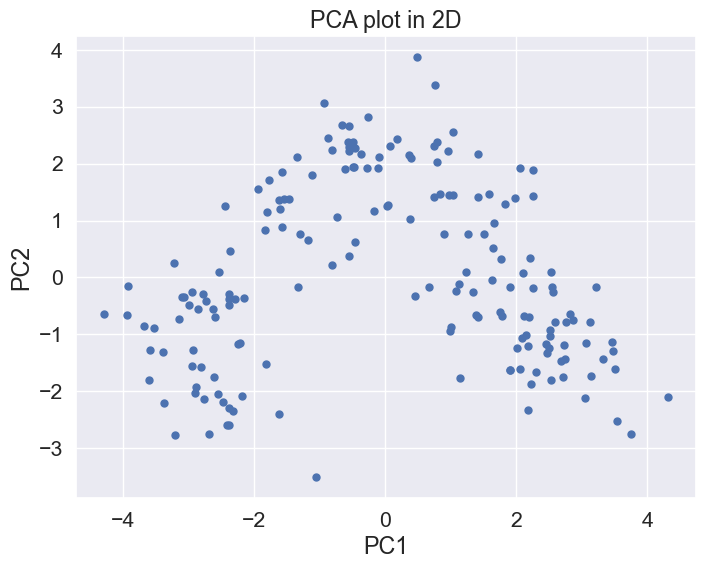

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], s=25)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')


### K-Means clustering

In [57]:
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0) #Kmeans는 iterative method임
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


PCA plot in 2D coloured by cluster

Text(0, 0.5, 'PC2')

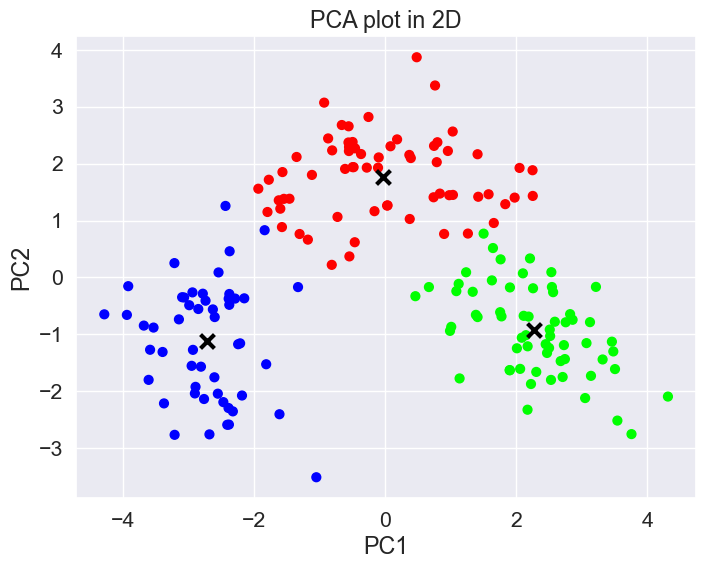

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=clusters, cmap='brg',  s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=100, linewidths=3, color='black')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

### PCA plot in 3D

In [67]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

#3D scatterplot
fig = px.scatter_3d(components, 
                    x=0, y=1, z=2 , 
                    color = clusters , 
                    size= 0.1*np.ones(len(X)),
                    opacity=1,
                    title = 'PCA plot in 3D',
                    labels = {'0': 'PC1', '1':'PC2', '2':'PC3'},
                    width = 650, height=500)
fig.show()

Expained variance

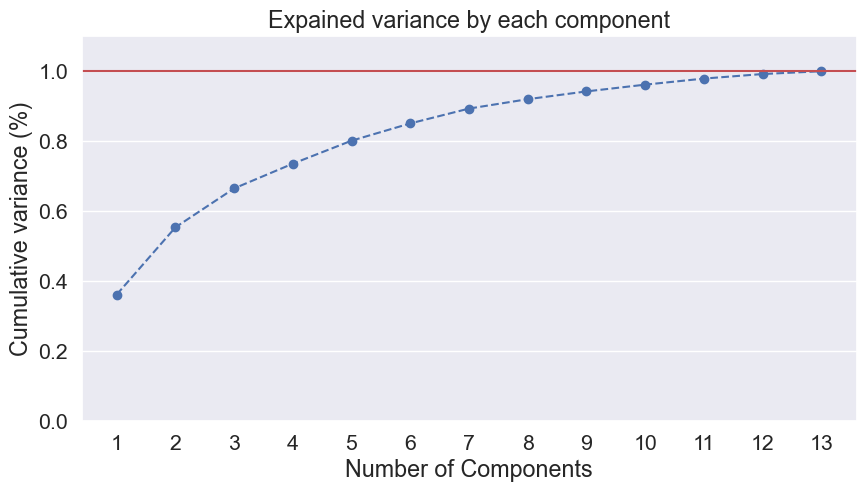

In [70]:
pca_var = PCA()
pca_var.fit(X)

plt.figure(figsize=(10,5))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.ylim(0.0, 1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1,1+X.shape[1],step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Expained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)


## t-SNE

In [87]:
# t-SNE
tsne = TSNE(n_components=2)  #PCA와 API는 같지만 , 이미 존재하는 Principle Compnent 차원에 대해서 2개만을 표현하는것과 2차원을 목표로 projection하는 차이가 있음
X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data = X_tsne, columns=['tsne comp. 1', 'tsne com. 2'])
tsne_df.head()

/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,tsne comp. 1,tsne com. 2
0,6.231440,9.185243
1,5.949075,5.231297
2,10.000048,6.711629
3,8.636070,9.517121
4,10.289110,2.633103


t-SNE plot in 2D coloured by class using K-means
- 매번마다 다른 plot이 생성됨(stochastic method)

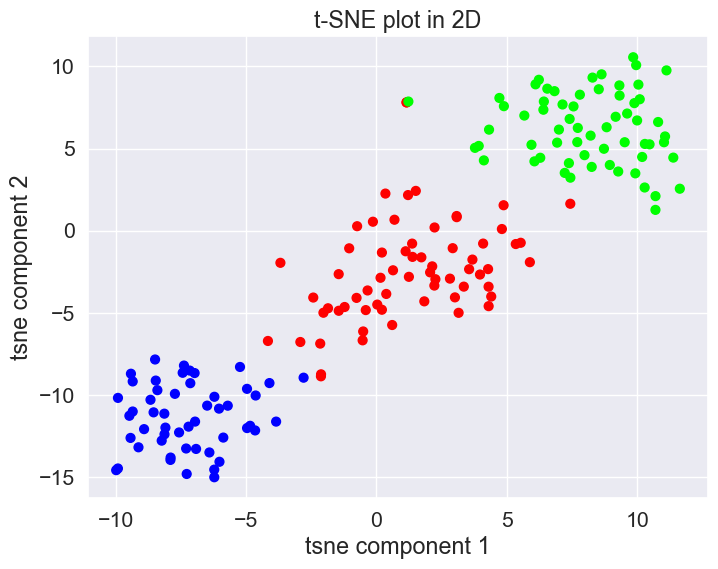

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap='brg', s=40)

plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap='brg', s=40)
plt.scatter()

plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')
plt.show()

t-SNE plot in 3D

In [91]:
tsne = TSNE(n_components=3)
components_tsne = tsne.fit_transform(X)

#3D scatterplot
fig = px.scatter_3d(components_tsne, x=0, y=1, z=2, color=clusters, 
                    size= 0.1*np.ones(len(X)), opacity=1,
                    title='t-SNE plot in 3D',
                    labels = {'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
                    width = 650, height=500)
fig.show()


/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



## UMAP
(Uniform Manifold Approximation and Proejection for demensionality reduction)
- t-SNE보다 global structure를 더 잘 보존하는 경향

In [110]:
reducer = umap.umap_.UMAP()
X_fit = reducer.fit(X)
X_umap = reducer.transform(X)

umap_df = pd.DataFrame(data= X_umap, columns = ['umap comp.1', 'umap comp.2'])
umap_df.head()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,umap comp.1,umap comp.2
0,13.369818,4.392301
1,13.432783,5.659607
2,14.696325,5.811215
3,14.748272,4.725739
4,14.204013,6.909851


UMAP plot in 2D coloured by clusters

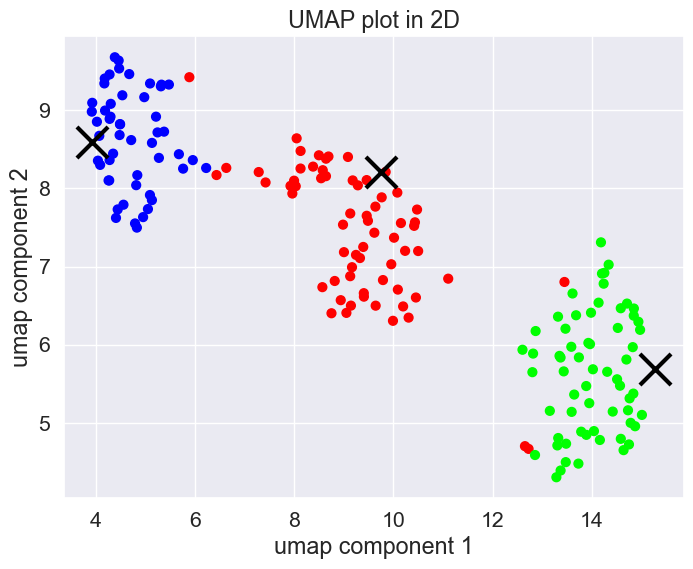

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=clusters, cmap="brg", s=40)

centroids_umap = reducer.transform(centroids)
plt.scatter(x=centroids_umap[:,0], y=centroids_umap[:,1], marker='x', s=500, linewidth=3, color='black')
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')
plt.show()

UMAP plot in 3D

In [132]:
reducer = umap.umap_.UMAP(n_components=3)
components_umap = reducer.fit_transform(X)



#3D scatterplot
fig = px.scatter_3d(components_umap, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(X)) ,opacity=1,
                    title='UMAP plot in 3D',
                    labels = {'0' : 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'})
fig.show()


###  PCA vs t-SNE vs UMAP
- PCA : 'linear embedding' , t-SNE, UMAP : 'non-linear embedding'
- t-SNE :  transform 메서드 존재X, centroid시각화 불가능 , local한 structure를 caputre하는데 초점
- UMAP : global and local structure를 유지하려는데 초점